In [1]:
# Importando bibliotecas
import pprint
import pandas as pd
import copy
import matplotlib.pyplot as plt
import os

# Importando arquivos
from cycles import calculate_basic_cycle, calculate_two_evaporators_cycle
from optimization import optimize_two_evaporators_cycle_with_multiple_refrigerants, optimize_basic_cycle_with_multiple_refrigerants

In [2]:
# Temperatura externa: https://en.climate-data.org/south-america/brazil/rio-de-janeiro/rio-de-janeiro-853/ (media das maximas)
# Temperaturas internas: pagina 18 do arquivo MFL70720817_PB.pdf (LG)
# Refrigerante base: pagina 6 do arquivo MFL70720817_PB.pdf (LG)
# Consumo: pagina 16 do arquivo CATALOGO_10_BRASTEMP (Brastemp)
# Tarifa media do kWh: https://www.aneel.gov.br/ranking-das-tarifas (Light RJ)

# Temperaturas novas por mes: https://www.climatempo.com.br/climatologia/321/riodejaneiro-rj
default_input_values = {
    't_internal_env_ht': 3 + 273.15,
    't_internal_env_lt': -18 + 273.15,
    'approach_condenser': 5,
    'approach_evaporator_ht': 5,
    'approach_evaporator_lt': 5,
    'q_evaporator_ht': 75,
    'q_evaporator_lt': 75,
    'isentropic_efficiency': 0.7,
    'subcooling': 0,
    'superheating_ht': 0,
    'superheating_lt': 0,
}

input_values = {
    't_internal_env_ht': 3 + 273.15,
    't_internal_env_lt': -18 + 273.15,
    'approach_condenser': 5,
    'approach_evaporator_ht': 5,
    'approach_evaporator_lt': 5,
    'f': 0.5,
    'isentropic_efficiency': 0.7,
    'subcooling': 5,
    'superheating_ht': 5,
    'superheating_lt': 5,
    'upper_threshold': 10,
    'lower_threshold': 0
}
input_ranges = {
    'refrigerants': ['R600a', 'R134a', 'R1234yf', 'R1234ze(E)', 'R22', 'R290', 'NH3', 'R404a', 'R410a'],
    't_external_env_month': [['Janeiro', 29], ['Fevereiro', 30], ['Março', 29], ['Abril', 28],
                             ['Maio', 26], ['Junho', 25], ['Julho', 24], ['Agosto', 25],
                             ['Setembro', 25], ['Outubro', 26], ['Novembro', 27], ['Dezembro', 28]]
}

optimized_cop_table = optimize_two_evaporators_cycle_with_multiple_refrigerants(default_input_values, 
                                                                                input_values, 
                                                                                'cop', 
                                                                                input_ranges)
optimized_cop_table.to_excel(os.getcwd() + r'\results\two_evaporators_cop.xlsx', index = False)

optimized_exergy_efficiency_table = optimize_two_evaporators_cycle_with_multiple_refrigerants(default_input_values, 
                                                                                              input_values, 
                                                                                              'exergy_efficiency_components', 
                                                                                              input_ranges)
optimized_exergy_efficiency_table.to_excel(os.getcwd() + r'\results\two_evaporators_exergy_efficiency.xlsx', index = False)

Starting
0.9259259259259259%
1.8518518518518519%
2.7777777777777777%
3.7037037037037037%
4.62962962962963%
5.555555555555555%
6.481481481481482%
7.407407407407407%
8.333333333333334%
9.25925925925926%
10.185185185185185%
11.11111111111111%
12.037037037037036%
12.962962962962964%
13.88888888888889%
14.814814814814815%
15.74074074074074%
16.666666666666668%
17.59259259259259%
18.51851851851852%
19.444444444444443%
20.37037037037037%
21.296296296296298%
22.22222222222222%
23.14814814814815%
24.074074074074073%
25.0%
25.925925925925927%
26.85185185185185%
27.77777777777778%
28.703703703703702%
29.62962962962963%
30.555555555555557%
31.48148148148148%
32.407407407407405%
33.333333333333336%
34.25925925925926%
35.18518518518518%
36.111111111111114%
37.03703703703704%
37.96296296296296%
38.888888888888886%
39.81481481481482%
40.74074074074074%
41.666666666666664%
42.592592592592595%
43.51851851851852%
44.44444444444444%
45.370370370370374%
46.2962962962963%
47.22222222222222%
48.1481481481481

In [3]:
default_input_values = {
    't_internal_env': 21 + 273.15,
    'approach_condenser': 5,
    'approach_evaporator': 5,
    'q_evaporator': 9000 * 0.293071,
    'isentropic_efficiency': 0.7,
    'subcooling': 0,
    'superheating': 0,
}

input_values = {
    't_internal_env': 21 + 273.15,
    'approach_condenser': 5,
    'approach_evaporator': 5,
    'isentropic_efficiency': 0.7,
    'subcooling': 5,
    'superheating': 5,
    'upper_threshold': 10,
    'lower_threshold': 0
}

input_ranges = {
    'refrigerants': ['R600a', 'R134a', 'R1234yf', 'R1234ze(E)', 'R22', 'R290', 'NH3', 'R404a', 'R410a'],
    't_external_env_month': [['Janeiro', 29], ['Fevereiro', 30], ['Março', 29], ['Abril', 28],
                             ['Maio', 26], ['Outubro', 26], ['Novembro', 27], ['Dezembro', 28]]
}

optimized_cop_table = optimize_basic_cycle_with_multiple_refrigerants(default_input_values, 
                                                                      input_values,
                                                                      'cop',
                                                                      input_ranges)
optimized_cop_table.to_excel(os.getcwd() + r'\results\basic_cop.xlsx', index = False)

optimized_exergy_efficiency_table = optimize_basic_cycle_with_multiple_refrigerants(default_input_values, 
                                                                                    input_values,
                                                                                    'exergy_efficiency_components',
                                                                                    input_ranges)
optimized_exergy_efficiency_table.to_excel(os.getcwd() + r'\results\basic_exergy_efficiency.xlsx', index = False)

Starting
1.3888888888888888%
2.7777777777777777%
4.166666666666667%
5.555555555555555%
6.944444444444445%
8.333333333333334%
9.722222222222221%
11.11111111111111%
12.5%
13.88888888888889%
15.277777777777779%
16.666666666666668%
18.055555555555557%
19.444444444444443%
20.833333333333332%
22.22222222222222%
23.61111111111111%
25.0%
26.38888888888889%
27.77777777777778%
29.166666666666668%
30.555555555555557%
31.944444444444443%
33.333333333333336%
34.72222222222222%
36.111111111111114%
37.5%
38.888888888888886%
40.27777777777778%
41.666666666666664%
43.05555555555556%
44.44444444444444%
45.833333333333336%
47.22222222222222%
48.611111111111114%
50.0%
51.388888888888886%
52.77777777777778%
54.166666666666664%
55.55555555555556%
56.94444444444444%
58.333333333333336%
59.72222222222222%
61.111111111111114%
62.5%
63.888888888888886%
65.27777777777777%
66.66666666666667%
68.05555555555556%
69.44444444444444%
70.83333333333333%
72.22222222222223%
73.61111111111111%
75.0%
76.38888888888889%
77.

         cop  subcooling
0   2.693223         0.0
1   2.718580         1.0
2   2.743864         2.0
3   2.769076         3.0
4   2.794218         4.0
5   2.819289         5.0
6   2.844291         6.0
7   2.869225         7.0
8   2.894091         8.0
9   2.918889         9.0
10  2.943620        10.0
11  2.968286        11.0
12  2.992886        12.0
13  3.017422        13.0
14  3.041893        14.0
15  3.066301        15.0
16  3.090646        16.0
17  3.114928        17.0
18  3.139148        18.0
19  3.163307        19.0
20  3.187405        20.0


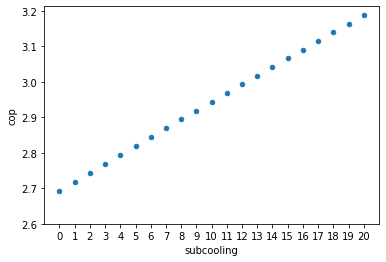

In [4]:
# Usando as variaveis de entrada do Yang (2015).pdf para comparar os ciclos
input_values = {
    't_external_env': 30 + 273.15,
    't_internal_env_ht': -5 + 273.15,
    't_internal_env_lt': -26 + 273.15,
    'approach_condenser': 0,
    'approach_evaporator_ht': 0,
    'approach_evaporator_lt': 0,
    'q_evaporator_ht': 239,
    'q_evaporator_lt': 246,
    'isentropic_efficiency': 0.78,
    'superheating_ht': 0,
    'superheating_lt': 0,
    'refrigerant': 'R600a'
}

input_ranges = {
    'subcooling': range(0,21)
}

original_input_values = copy.copy(input_values)
results = pd.DataFrame(columns=['cop',
                                'subcooling'])
for subcooling in input_ranges['subcooling']:
    input_values = copy.copy(original_input_values)
    input_values['subcooling'] = subcooling
    cycle = calculate_two_evaporators_cycle(input_values)
    results = results.append({
        'cop': cycle['cop'],
        'subcooling': subcooling
    }, ignore_index=True)

results.plot(x='subcooling', y='cop', kind='scatter', xticks=range(0,21), yticks=[2 + (x * 0.1) for x in range(6, 13)])
pprint.pprint(results)